## ANN Binary Classification


In [74]:
# Imports
import numpy as np

import torch
import torch.nn as nn

# Pytorch Gpu Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

import matplotlib.pyplot as plt

# Matplotlib svg plots for better pictures
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

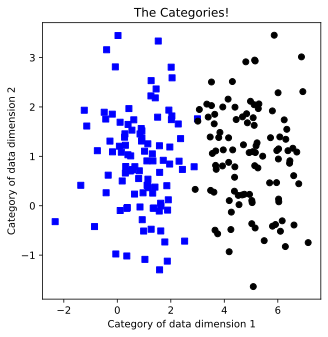

In [75]:
# Create the data
nPerCluster = 100
blur = 1  # Std Deviation of 1

A = [1, 1]
B = [5, 1]

# Generate the data
a = [
    A[0] + np.random.randn(nPerCluster) * blur,
    A[1] + np.random.randn(nPerCluster) * blur,
]
b = [
    B[0] + np.random.randn(nPerCluster) * blur,
    B[1] + np.random.randn(nPerCluster) * blur,
]

# True labels
labels_np = np.vstack((np.zeros((nPerCluster, 1)), np.ones((nPerCluster, 1))))

# Stack it into a matrix
data_np = np.hstack((a, b)).T

# Convert np matrix into a tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Plot the data
fig = plt.figure(figsize=(5, 5))
plt.plot(
    data[np.where(labels.cpu() == 0)[0], 0].cpu(),
    data[np.where(labels.cpu() == 0)[0], 1].cpu(),
    "bs",
)
plt.plot(
    data[np.where(labels.cpu() == 1)[0], 0].cpu(),
    data[np.where(labels.cpu() == 1)[0], 1].cpu(),
    "ko",
)
plt.title("The Categories!")
plt.xlabel("Category of data dimension 1")
plt.ylabel("Category of data dimension 2")
plt.show()

In [76]:
# Model
ANN_classify = nn.Sequential(nn.Linear(2, 1), nn.ReLU(), nn.Linear(1, 1), nn.Sigmoid())

ANN_classify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [77]:
# Model Features
lr = 0.01

# Loss Function
loss_fun = (
    nn.BCELoss()
)  # For Classification we use Binarry cross entropy or BCEWithLogitsLoss( This inclues sigmoid internall)

# Optimizer
optimizer = torch.optim.SGD(ANN_classify.parameters(), lr=lr)

In [78]:
# Train the model
n_epoches = 5000
losses = torch.zeros(n_epoches)

for epoch in range(n_epoches):
    # Forward pass
    yHat = ANN_classify(data)

    # Compute the loss
    loss = loss_fun(yHat, labels)
    losses[epoch] = loss

    # Back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

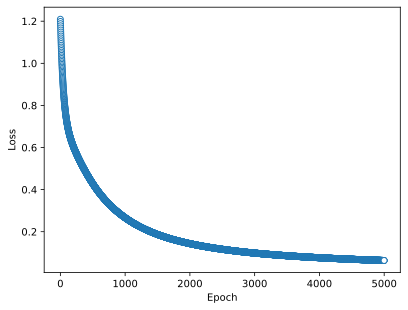

In [79]:
# Plot the losses
plt.plot(losses.cpu().detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [80]:
# Predictions
preditions = ANN_classify(data)
predlabels = preditions > 0.5

# Errors
missclassified = np.where(predlabels.cpu() != labels.cpu())[0]

# Accuracy
total_accuracy = 100 - 100 * len(missclassified) / (2 * nPerCluster)
print("Final Accuracy: %g%%" % total_accuracy)

Final Accuracy: 99%


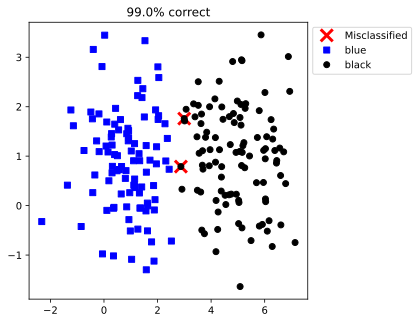

In [81]:
# plot the labeled data
fig = plt.figure(figsize=(5, 5))
plt.plot(
    data[missclassified, 0].cpu().detach(),
    data[missclassified, 1].cpu().detach(),
    "rx",
    markersize=12,
    markeredgewidth=3,
)
plt.plot(
    data[np.where(~predlabels.cpu())[0], 0].cpu(),
    data[np.where(~predlabels.cpu())[0], 1].cpu(),
    "bs",
)
plt.plot(
    data[np.where(predlabels.cpu())[0], 0].cpu(),
    data[np.where(predlabels.cpu())[0], 1].cpu(),
    "ko",
)

plt.legend(["Misclassified", "blue", "black"], bbox_to_anchor=(1, 1))
plt.title(f"{total_accuracy}% correct")
plt.show()

## Parametric Experiments with Learning Rate and other things


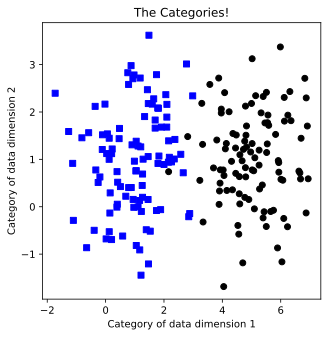

In [82]:
# Create the data
nPerCluster = 100
blur = 1  # Std Deviation of 1

A = [1, 1]
B = [5, 1]

# Generate the data
a = [
    A[0] + np.random.randn(nPerCluster) * blur,
    A[1] + np.random.randn(nPerCluster) * blur,
]
b = [
    B[0] + np.random.randn(nPerCluster) * blur,
    B[1] + np.random.randn(nPerCluster) * blur,
]

# True labels
labels_np = np.vstack((np.zeros((nPerCluster, 1)), np.ones((nPerCluster, 1))))

# Stack it into a matrix
data_np = np.hstack((a, b)).T

# Convert np matrix into a tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Plot the data
fig = plt.figure(figsize=(5, 5))
plt.plot(
    data[np.where(labels.cpu() == 0)[0], 0].cpu(),
    data[np.where(labels.cpu() == 0)[0], 1].cpu(),
    "bs",
)
plt.plot(
    data[np.where(labels.cpu() == 1)[0], 0].cpu(),
    data[np.where(labels.cpu() == 1)[0], 1].cpu(),
    "ko",
)
plt.title("The Categories!")
plt.xlabel("Category of data dimension 1")
plt.ylabel("Category of data dimension 2")
plt.show()

In [ ]:
# Function to build and train the model
def createANNModel(lr):
    # Model Architecture
    ANN_classify = nn.Sequential(
        nn.Linear(2, 1),
        nn.ReLU(),
        nn.Linear(1, 1),
        # nn.Sigmoid() # We don't need this because we are using BCEWithLogitsLoss() which has sigmoid layer inbuilt and has better numerical stabelity
    )
    # Loss function
    loss_fun = nn.BCEWithLogitsLoss()

    # optimizer
    optimizer = torch.optim.SGD(ANN_classify.parameters(), lr=lr)

    # Model Output
    return ANN_classify, loss_fun, optimizer

In [85]:
# Function to train the model
def trainTheModel(ANNmodel, n_epoches):
    # initilize losses
    losses = torch.zeros(n_epoches)

    for epoch in range(n_epoches):
        # Forward pass
        yHat = ANNmodel(data)

        # Compute the loss
        loss = loss_fun(yHat, labels)
        losses[epoch] = loss

        # Back prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Final forward pass
    predictions = ANNmodel(data)

    total_accuracy = 100 * torch.mean(((predictions > 0) == labels).float())
    return losses, predictions, total_accuracy

Final Accuracy: 97.0


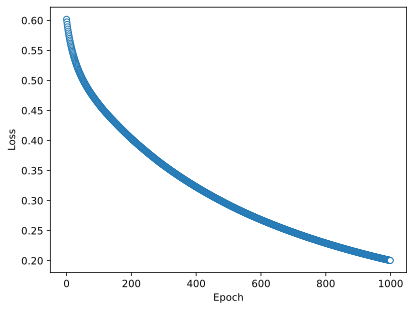

In [ ]:
n_epoches = 1000
# Create everything
ANN_classify, loss_fun, optimizer = createANNModel(0.01)

# Run the model
losses, preditions, total_accuracy = trainTheModel(ANN_classify, n_epoches)

# Final Accuracy
print(f"Final Accuracy: {total_accuracy}")

# show the losses
plt.plot(losses.cpu().detach(), "o", markerfacecolor="w", linewidth=0.1)
plt.xlabel("Epoch"), plt.ylabel("Loss")
plt.show()

#### Expirement Starts Here


In [96]:
# Learning rates
lrs = np.linspace(0.001, 0.1, 40)

# Initialize Output Results
accByLR = []
allLosses = np.zeros((len(lrs), n_epoches))

# Loop through lrs
for i, lr in enumerate(lrs):
    # Create and run the model
    ANN_classify, loss_fun, optimizer = createANNModel(lr)
    losses, preditions, total_accuracy = trainTheModel(ANN_classify, n_epoches)

    # Store the results
    accByLR.append(total_accuracy.cpu().detach())
    allLosses[i, :] = losses.cpu().detach()

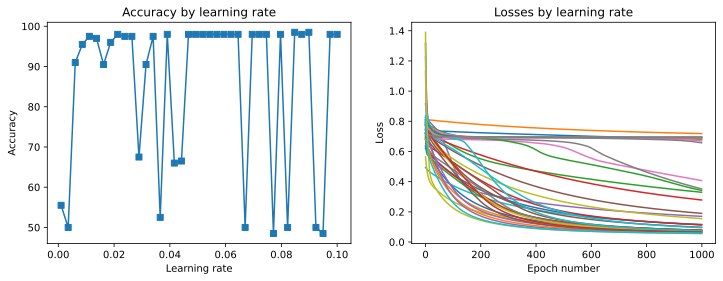

In [ ]:
# Plot the result
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(lrs, accByLR, "s-")
ax[0].set_xlabel("Learning rate")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy by learning rate")

ax[1].plot(allLosses.T)
ax[1].set_title("Losses by learning rate")
ax[1].set_xlabel("Epoch number")
ax[1].set_ylabel("Loss")
plt.show()

In [99]:
# proportion of runs where the model had at least 70% accuracy
sum(torch.tensor(accByLR) > 70) / len(accByLR)

tensor(0.7250, device='cuda:0')